In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# plotly library
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm


In [70]:
df_train = pd.read_csv("train.csv")


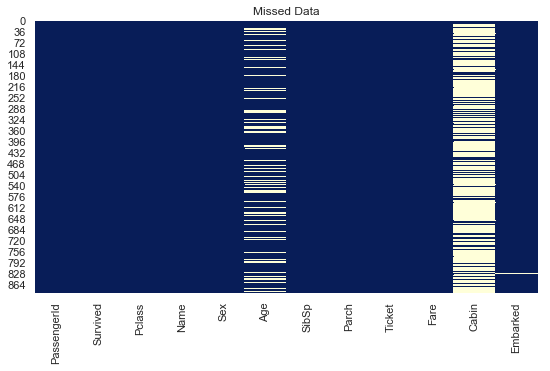

In [71]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.title("Missed Data")
plt.show()

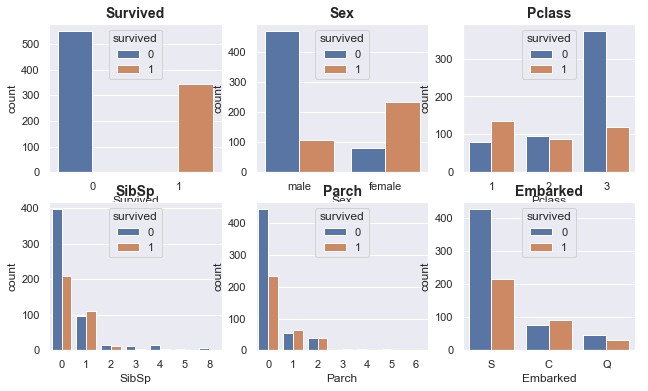

In [5]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df_train[cols[i]], hue=df_train["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 

In [6]:
#Of the 891 passengers in df_train, less than 350 survive.
#Much more women survive than men.
#Also, the chance to survive is much higher in Pclass 1 and 2 than in Class 3.
#Survival rate for passengers travelling with SibSp or Parch is higher than for those travelling alone.
#Passengers embarked in C and Q are more likely to survie than those embarked in S.

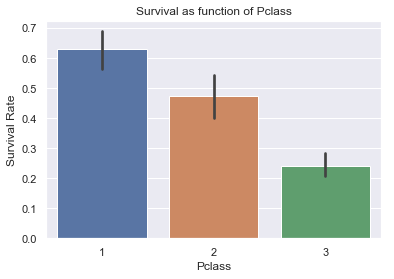

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

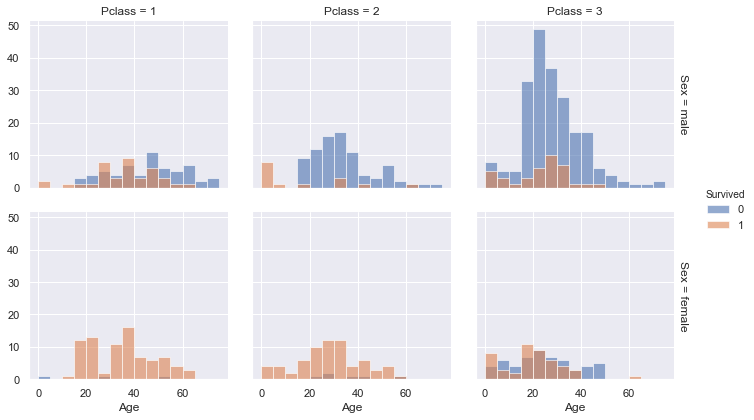

In [8]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show() 
#Distribution of Age as function of Pclass, Sex and Survived



In [9]:
#Best chances to survive for male passengers was in Pclass 1 or being below 5 years old.
#Lowest survival rate for female passengers was in Pclass 3 and being older than 40.
#Most passengers were male, in Pclass 3 and between 15-35 years old.

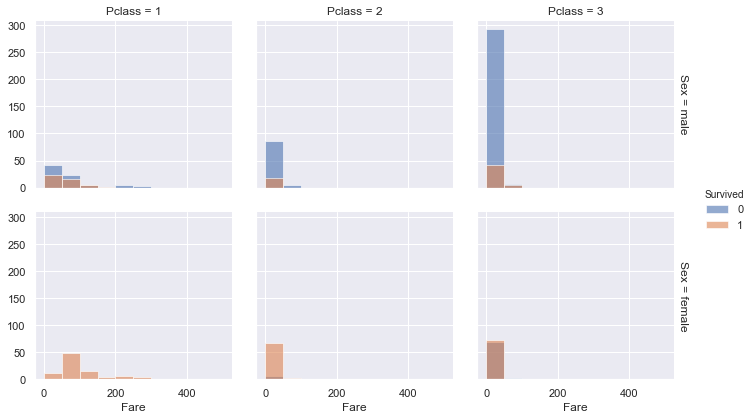

In [10]:
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'Fare', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()
#Disribution of Fare as function of Pclass, Sex and Survived



In [11]:
# Most passengers had low fare
# Most rich passengers were in pclass 1

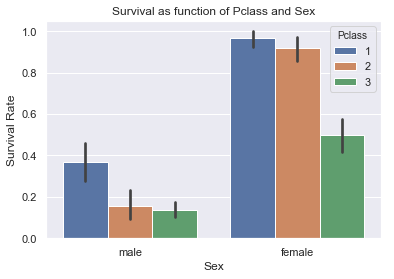

In [12]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()


In [13]:
#Highest survival rate (>0.9) for women in Pclass 1 or 2.
#Lowest survival rate (<0.2) for men in Pclass 3.

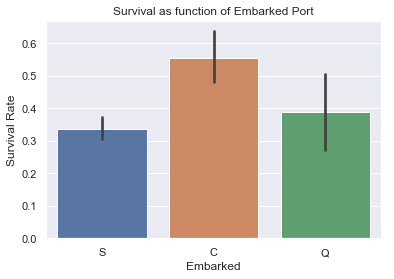

In [14]:
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

In [15]:
#Passengers embarked in "S" had the lowest survival rate, those embarked in "C" the highest.


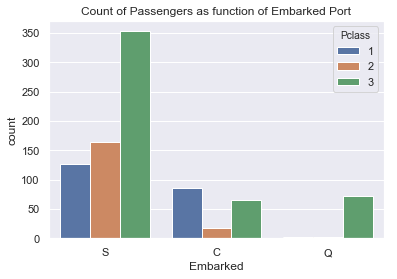

In [16]:
sns.countplot(x='Embarked', hue='Pclass', data=df_train)
plt.title("Count of Passengers as function of Embarked Port")
plt.show()

In [17]:
#For every class, the largest count of Passengers embarked in "S".


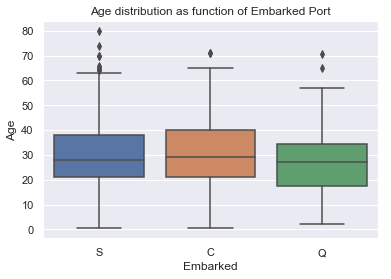

In [18]:
sns.boxplot(x='Embarked', y='Age', data=df_train)
plt.title("Age distribution as function of Embarked Port")
plt.show()

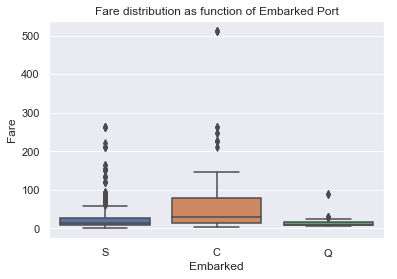

In [19]:
# We see all embarked lie in 20-37 years 
sns.boxplot(x='Embarked', y='Fare', data=df_train)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

In [20]:
#Mean fare for Passengers embarked in "C" was higher.



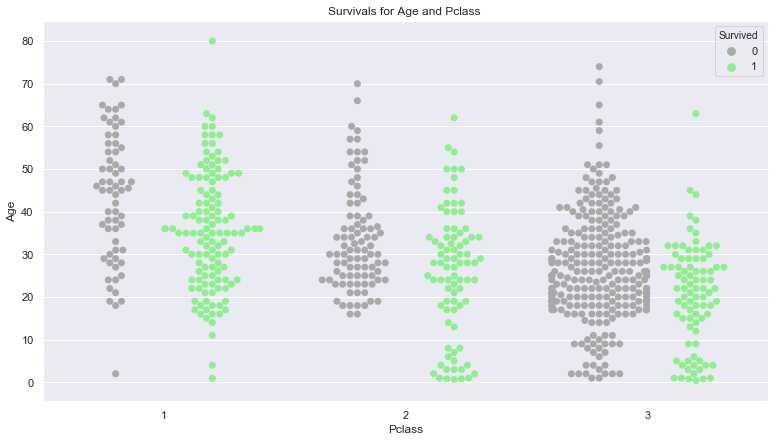

In [21]:
cm_surv = ["darkgrey" , "lightgreen"]

fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=df_train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()


In [22]:
#Here, the high survival rate for kids in Pclass 2 is easily observed.
#Also, it becomes more obvious that for passengers older than 40 the best chance to survive is in Pclass 1,
#and smallest chance in Pclass 3

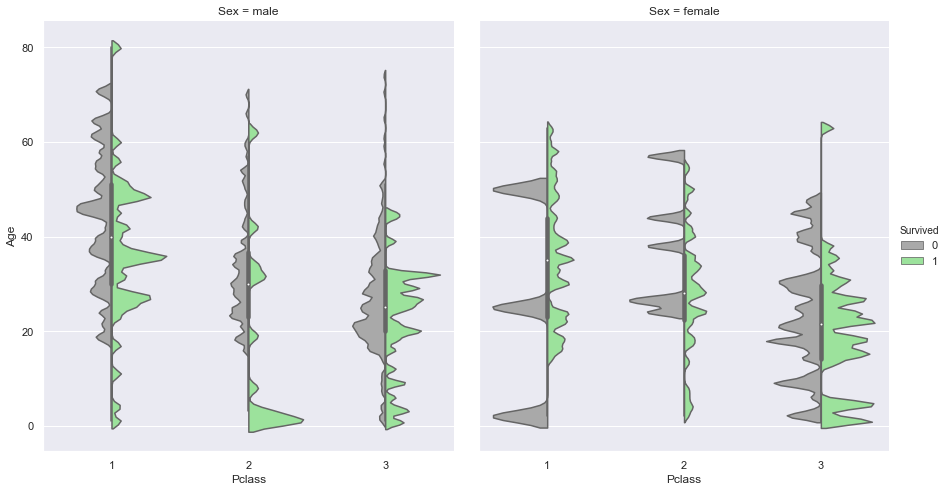

In [23]:

g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df_train, kind="violin", split=True, bw=0.05, palette=cm_surv, height=7, aspect=.9, s=7)

In [24]:
#------------------Data Wrangling and Feature Engineering------------------

In [72]:
# New Features: 'FamilySize' , 'Alone'
for df in [df_train] :
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] +1
    
    df['Alone']=0
    df.loc[(df.FamilySize==1),'Alone'] = 1
    df['Title']=0
    df['Title']=df.Name.str.extract(r'([A-Za-z]+)\.') #lets extract the Salutations
    df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


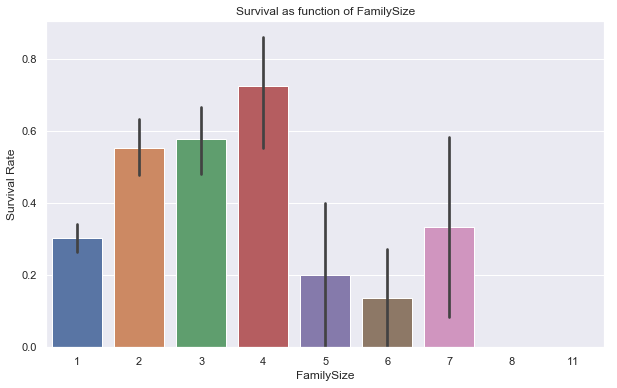

In [73]:
plt.subplots(figsize=(10,6))
sns.barplot(x='FamilySize' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of FamilySize")
plt.show()

In [74]:
grps_title_survrate = df_train.groupby(['Title'])['Survived'].mean().to_frame()
grps_title_survrate


,Survived
Title,
Master,0.575000
Miss,0.704301
Mr,0.162571
Mrs,0.795276
Other,0.111111


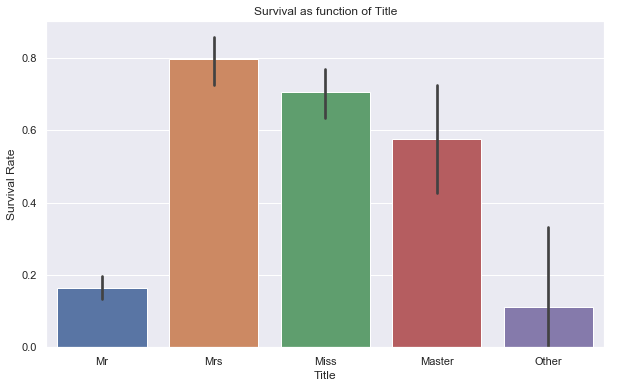

In [75]:
plt.subplots(figsize=(10,6))
sns.barplot(x='Title' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Title")
plt.show()

In [76]:
#  Fill NaN with mean or mode
for df in [df_train]:

    # Title
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])

    # Age: use Title to fill missing values
    df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()
    df = df.drop('Name', axis=1)
    

#  Embarked
df_train.info()
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0])

# Fare
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
Alone          891 non-null int64
Title          891 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 83.6+ KB


In [77]:
for df in [df_train]:
    
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i
        
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i  
        
    # convert Title to numerical
    df['Title'] = df['Title'].map( {'Other':0, 'Mr': 1, 'Master':2, 'Miss': 3, 'Mrs': 4 } )
    # fill na with maximum frequency mode
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
    df['Title'] = df['Title'].astype(int) 
    

In [78]:
df_train['Embarked_S'] = df_train["Embarked"].apply(lambda x: 1 if x == "S" else 0)
df_train['Embarked_C'] = df_train["Embarked"].apply(lambda x: 1 if x == "C" else 0)
df_train['Embarked_Q'] = df_train["Embarked"].apply(lambda x: 1 if x == "Q" else 0)

df_train['Pclass_1'] = df_train["Pclass"].apply(lambda x: 1 if x == 1 else 0)
df_train['Pclass_2'] = df_train["Pclass"].apply(lambda x: 1 if x == 2 else 0)
df_train['Pclass_3'] = df_train["Pclass"].apply(lambda x: 1 if x == 3 else 0)

df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

df_train.loc[ df_train['Age'] <= 16, 'Age'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 32), 'Age'] = 1
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <= 48), 'Age'] = 2
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <= 64), 'Age'] = 3

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',  'Parch', 'Age', 'Fare','Pclass', 'Embarked']
df_train = df_train.drop(drop_elements, axis = 1)


In [79]:
df_train.head()

,Survived,Sex,FamilySize,Alone,Title,Age_bin,Fare_bin,Embarked_S,Embarked_C,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
0,0,1,2,0,1,3.0,1.0,1,0,0,0,0,1
1,1,0,2,0,4,4.0,2.0,0,1,0,1,0,0
2,1,0,1,1,3,3.0,1.0,1,0,0,0,0,1
3,1,0,2,0,4,4.0,2.0,1,0,0,1,0,0
4,0,1,1,1,1,4.0,1.0,1,0,0,0,0,1


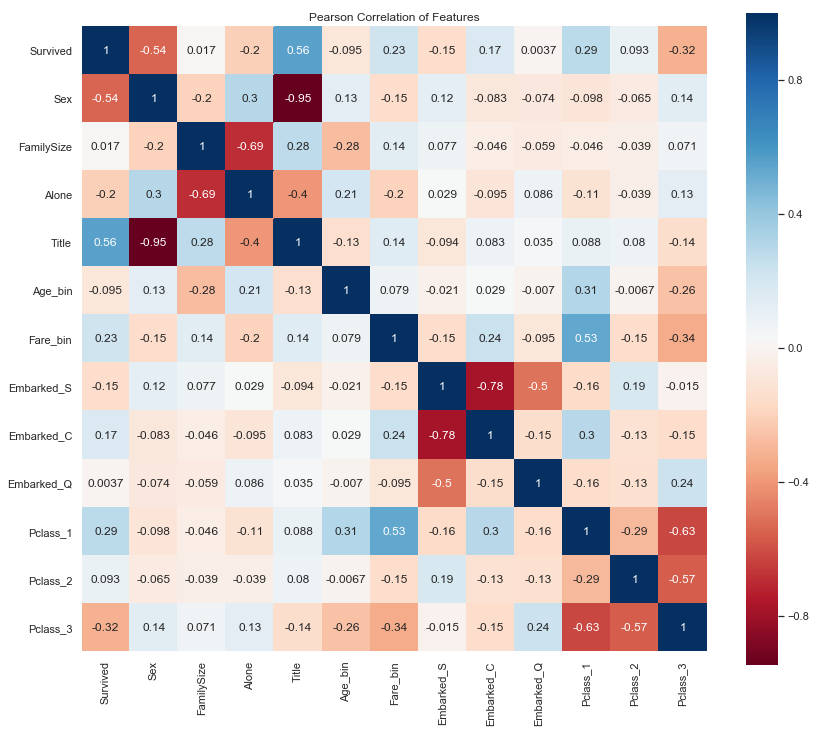

In [80]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(df_train.astype(float).corr(), 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [81]:
#--------------- My Titanic analysis----------------------

In [82]:
#--------------- My Titanic analysis----------------------

#Of the 891 passengers in df_train, less than 350 survive.
#Much more women survive than men.
#Also, the chance to survive is much higher in Pclass 1 and 2 than in Class 3.
#Survival rate for passengers travelling with SibSp or Parch is higher than for those travelling alone.
#Passengers embarked in C and Q are more likely to survie than those embarked in S.
#Distribution of Age as function of Pclass, Sex and Survived
#Highest survival rate (>0.9) for women in Pclass 1 or 2.
#Lowest survival rate (<0.2) for men in Pclass 3.
#Passengers embarked in "S" had the lowest survival rate, those embarked in "C" the highest.
#For every class, the largest count of Passengers embarked in "S".
# We see all embarked lie in 20-37 years 
#Mean fare for Passengers embarked in "C" was higher.
#Here, the high survival rate for kids in Pclass 2 is easily observed.
#Also, it becomes more obvious that for passengers older than 40 the best chance to survive is in Pclass 1,
#and smallest chance in Pclass 3

# Modeling

In [103]:
cols = ['Embarked_S', 'Embarked_C', 'Embarked_Q', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex', 'Title', 'Fare_bin', 'Age_bin', 'Alone', 'FamilySize']

tcols = np.append(['Survived'],cols)
train, test = train_test_split(df_train, test_size=0.2)

X = train.loc[:,cols]
y = np.ravel(train.loc[:,['Survived']])

X_test = test.loc[:,cols]
y_test = np.ravel(test.loc[:,['Survived']])

In [104]:
#Logistic Regression
from sklearn.model_selection import cross_val_score
clf_log = LogisticRegression()
clf_log = clf_log.fit(X,y)
score_log = cross_val_score(clf_log, X, y, cv=5).mean()
print(score_log)

0.8357107880632004


In [105]:
#Perceptron
clf_pctr = Perceptron(
    class_weight='balanced'
    )
clf_pctr = clf_pctr.fit(X,y)
score_pctr = cross_val_score(clf_pctr, X, y, cv=5).mean()
print(score_pctr)


0.7879806338901335


In [106]:
#K Nearest Neighbours
clf_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance'
    )
clf_knn = clf_knn.fit(X,y)
score_knn = cross_val_score(clf_knn, X, y, cv=5).mean()
print(score_knn)

0.8342922086404257


In [107]:
#SVM
clf_svm = svm.SVC(
    class_weight='balanced'
    )
clf_svm.fit(X, y)
score_svm = cross_val_score(clf_svm, X, y, cv=5).mean()

print(score_svm)

0.8356909497454899


In [108]:
#Naive Bayes
clf_bay = GaussianNB()
clf_bay.fit(X,y)
score_bay = cross_val_score(clf_bay, X, y, cv=5).mean()

print(score_bay)

0.8005776163702445


In [109]:
#Bagging 
bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=2,
        weights='distance'
        ),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
    )
clf_bag = bagging.fit(X,y)
score_bag = clf_bag.oob_score_

print(score_bag)

0.8146067415730337


In [110]:
#Decision Tree
clf_tree = tree.DecisionTreeClassifier(
    #max_depth=3,\
    class_weight="balanced",\
    min_weight_fraction_leaf=0.01\
    )
clf_tree = clf_tree.fit(X,y)
score_tree = cross_val_score(clf_tree, X, y, cv=5).mean()

print(score_tree)

0.8300174702931669


In [111]:
#Random Forest
clf_rf = RandomForestClassifier(
    n_estimators=1000, \
    max_depth=None, \
    min_samples_split=10 \
    #class_weight="balanced", \
    #min_weight_fraction_leaf=0.02 \
    )
clf_rf = clf_rf.fit(X,y)
score_rf = cross_val_score(clf_rf, X, y, cv=5).mean()

print(score_rf)

0.8426838170320341


In [45]:
#eXtreme Gradient Boosting - XGBoost:
clf_xgb = xgb.XGBClassifier(max_depth=2, n_estimators=500, subsample=0.5, learning_rate=0.1)
clf_xgb.fit(X,y)
score_xgb = cross_val_score(clf_xgb, X, y, cv=5).mean()
print(score_xgb)

NameError: name 'xgb' is not defined

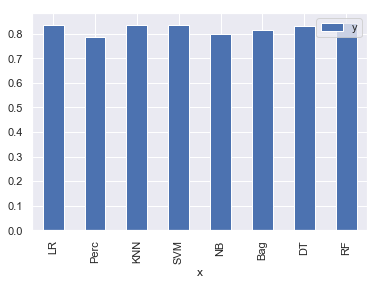

In [112]:
x=['LR','Perc', 'KNN','SVM','NB', 'Bag', 'DT', 'RF']
y = []

y.append(score_log)
y.append(score_pctr)
y.append(score_knn)
y.append(score_svm)
y.append(score_bay)
y.append(score_bag)
y.append(score_tree)
y.append(score_rf)
#y.append(score_xgb)

ff=pd.DataFrame({'x':x,'y':y})

ax = ff.plot.bar(x='x', y='y')